In [2]:
import cv2 
import numpy as np
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import statistics 
from numpy import var
import os
import glob
from skimage.restoration import (denoise_wavelet, estimate_sigma)
#from skimage.util import random_noise
#from skimage.metrics import peak_signal_noise_ratio
import skimage.io
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

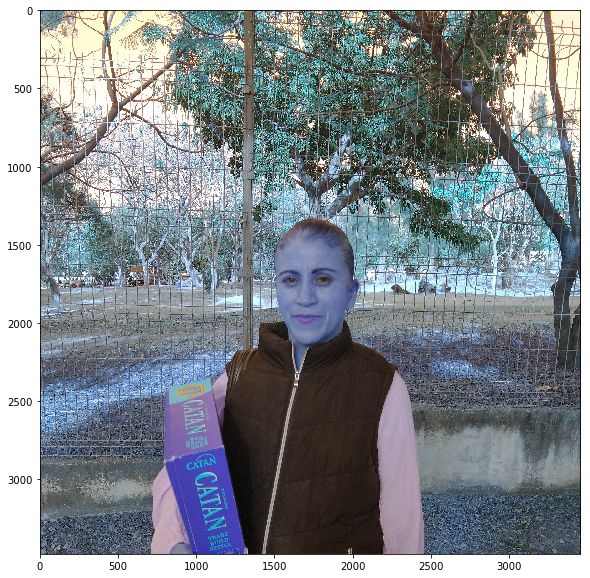

In [25]:
#bgr = cv2.imread("foto.jpg",cv2.IMREAD_GRAYSCALE)
bgr=cv2.imread('foto.jpg')
plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.imshow(bgr,cmap='gray')
plt.show()


In [26]:
img=cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

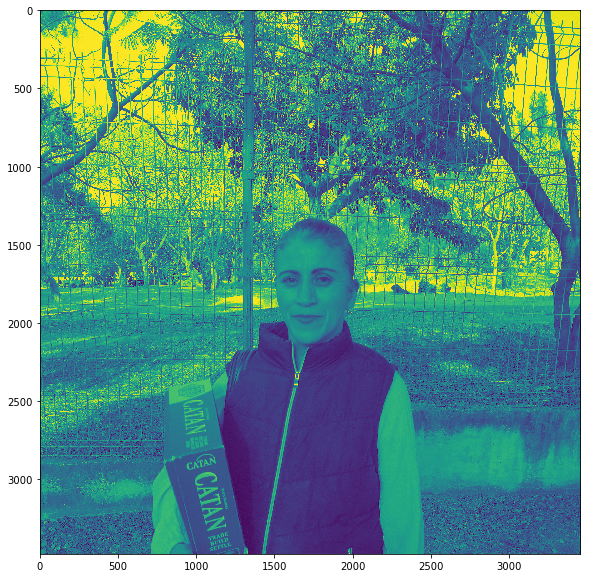

In [27]:
c1=img[:,:,0]
c2=img[:,:,1]
c3=img[:,:,2]
plt.figure(figsize=(10,10))
plt.imshow(c2)
plt.show()

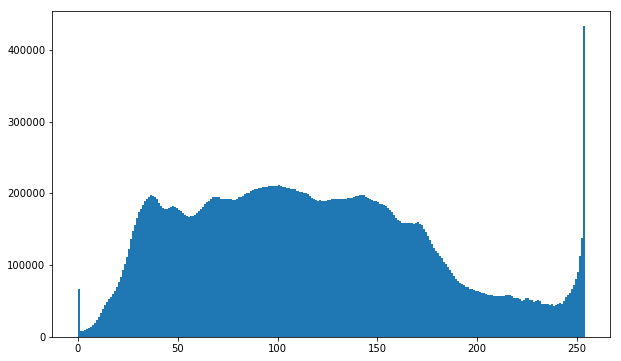

In [12]:
plt.hist(bgr.flatten(), bins=range(255))
plt.show()

In [28]:
kernel=np.ones((3,3),np.float32)/9
I1=cv2.filter2D(bgr,-1,kernel)   #CONVOLUCION
I2=cv2.blur(bgr,(3,3))   #PROMEDIO
I3=cv2.GaussianBlur(bgr,(3,3),0)  #GAUSSIANO


In [29]:
Imagen=[I1,I2,I3]
t=['CONVOLUCION','PROMEDIO','GAUSSIANO']


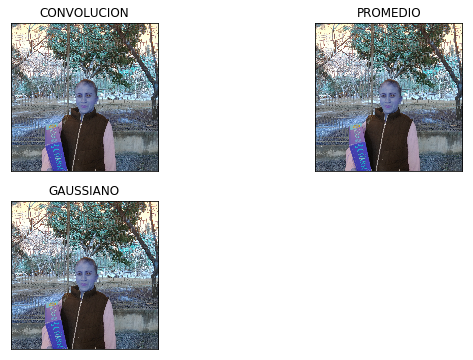

In [30]:
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.imshow(Imagen[i],vmin=0,vmax=255, cmap='gray')
    plt.title(t[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [31]:
img_gauss_float=bgr.astype(np.float)
filtro_Gauss_float=cv2.GaussianBlur(img_gauss_float,(7,7),0) #el valor de (7,7), es el tamaño del kernel.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


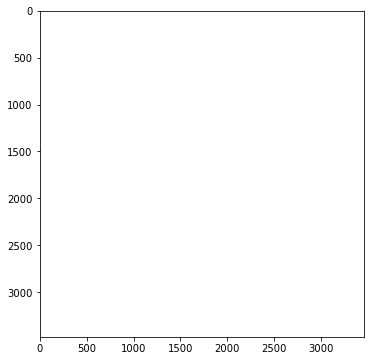

In [32]:
plt.figure()
plt.imshow(filtro_Gauss_float,cmap='gray')
plt.show()

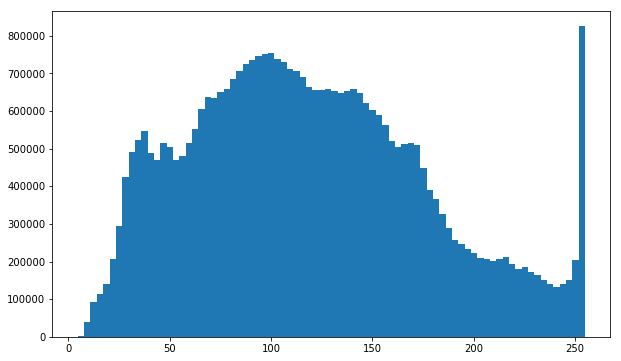

In [33]:
plt.hist(filtro_Gauss_float.flatten(), bins=80)
plt.show()

In [34]:
E=bgr-filtro_Gauss_float

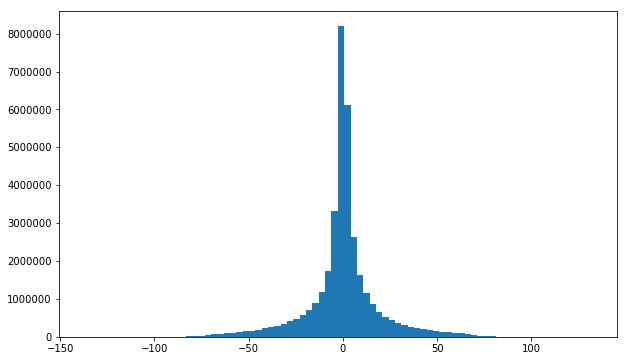

In [35]:
plt.hist(E.flatten(), bins=80)
plt.show()

In [28]:
img_conv_float=bgr.astype(np.float)
filtro_conv_float=cv2.filter2D(img_conv_float,-1,kernel)  

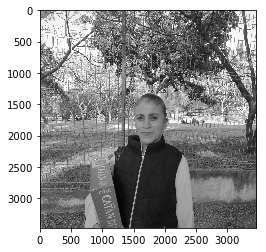

In [30]:
plt.figure()
plt.imshow(filtro_conv_float,cmap='gray')
plt.show()

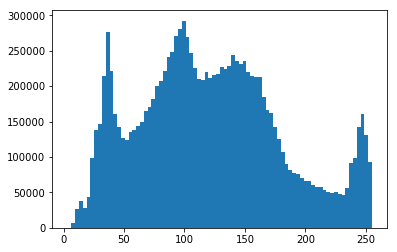

In [31]:
plt.hist(filtro_conv_float.flatten(), bins=80)
plt.show()

In [33]:
E1=bgr-filtro_conv_float

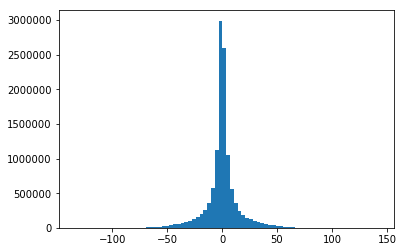

In [34]:
plt.hist(E1.flatten(), bins=80)
plt.show()

In [39]:
img_prom_float=bgr.astype(np.float)
filtro_prom_float=cv2.blur(img_prom_float,(3,3)) 

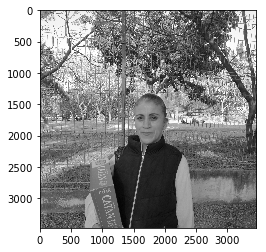

In [40]:
plt.figure()
plt.imshow(filtro_prom_float,cmap='gray')
plt.show()

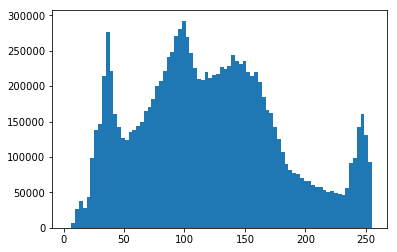

In [41]:
plt.hist(filtro_prom_float.flatten(), bins=80)
plt.show()

In [42]:
E2=bgr-filtro_prom_float

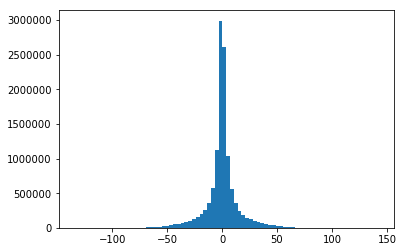

In [43]:
plt.hist(E2.flatten(), bins=80)
plt.show()

In [44]:

img=skimage.img_as_float(bgr)

sigma=0.1 #Noise Std
imgn=random_noise(img,var=sigma**2)
sigma_est=estimate_sigma(imgn,average_sigmas=True) #adding Noise)
img_bayes=denoise_wavelet(imgn,wavelet='bior6.8',mode='soft',wavelet_levels= 3,method='BayesShrink',rescale_sigma='Tre')

img_visushrink = denoise_wavelet(imgn, convert2ycbcr=True,wavelet_levels=5,wavelet='bior6.8',
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/3, rescale_sigma=True,multichannel = True)
#Finding PSNR
psnr_noisy=peak_signal_noise_ratio(img,imgn)
psnr_bayes=peak_signal_noise_ratio(img,img_bayes)
psnr_visu=peak_signal_noise_ratio(img,img_visushrink)

#Plotting Images
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Imagen original",fontsize=10)

plt.subplot(2,2,2)
plt.imshow(imgn,cmap=plt.cm.gray)
plt.title('Imagen con ruido',fontsize=10)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Denoised Image using Bayes',fontsize=10)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Denoised Image using Visushrink',fontsize=10)

plt.show()


C:\Users\Dell\anaconda3\envs\python-cvcourse\lib\site-packages\skimage\restoration\_denoise.py:850: UserWarning: Wavelet thresholding was designed for use with orthogonal wavelets. For nonorthogonal wavelets such as bior6.8, results are likely to be suboptimal.
  wavelet_levels=wavelet_levels)


ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (3476, 3456)

# FILTRO PASA ALTAS (HP FILTER)

In [3]:
im=cv2.imread('FOTO.jpg')
imag=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
c1=imag[:,:,0]
c2=imag[:,:,1]
c3=imag[:,:,2]
#plt.figure(figsize=(10,10))
#plt.imshow(c2)
#plt.show()


In [82]:
#B, G, R = cv2.split(imag) otra forma de separar los colores 

In [3]:
imag_HP_float=c2.astype(np.float)
A=imag_HP_float.copy()


In [4]:
c2.shape

(3476, 3456)

In [85]:
A=imag_HP_float.copy()
m,n=A.shape
B=np.zeros((m,n));
i=2
j=2
#h=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
h=np.array([[0,1,0],[1,-4,1],[0,1,0]]) # arreglo de un filtro HP

In [86]:
for i in range(m-1):
    for j in range(n-1):
        B[i,j]=(h[0,0]*A[i-1,j-1]+ h[0,1]*A[i-1,j]+h[0,2]*A[i-1,j+1])+h[1,0]*A[i,j-1]+h[1,1]*A[i,j]+h[1,2]*A[i,j+1]+h[2,0]*A[i+1,j-1]+h[2,1]*A[i+1,j]+h[2,2]*A[i+1,j+1]
        #B[i,j]=abs(B[i,j])

        

In [9]:
#m, n = img.shape
import statistics 
from numpy import var
temp=0  
temp1=0
img_new = np.zeros([m,n])
A1=[]
A2=[]
for i in range(0,m,1):  # filas
   
    
    for j in range(0, n-1,2):  # Columnas
       
            if i%2==0:
                A1.append(A[i,j])
                A2.append(A[i,j+1])
            else:
                A2.append(A[i,j])
                A1.append(A[i,j+1])
                
print("varianza v1",var(A1))
print("varianza v2",var(A2))

print("media A1",np.mean(A1))
print("media A2",np.mean(A2))


varianza v1 4070.317703334644
varianza v2 4024.332871519161
media A1 119.8391040547884
media A2 120.19845058576269


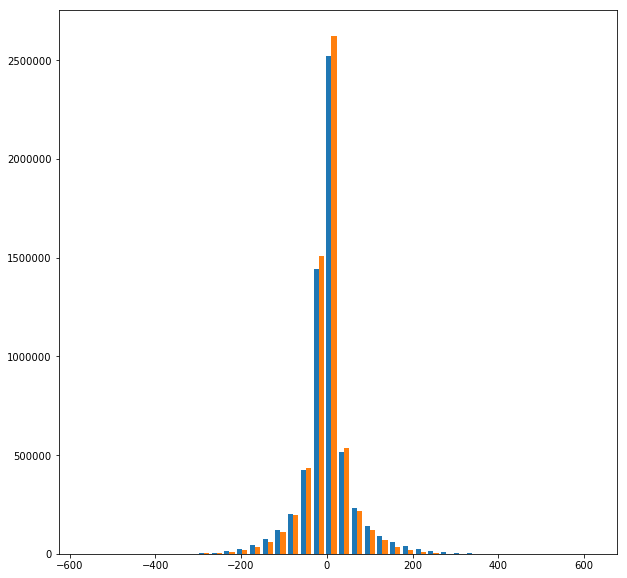

In [88]:
plt.figure(figsize=(10,10))
plt.hist([A1,A2], bins=40)
plt.show()

In [89]:
A.shape

(3476, 3456)

In [90]:
img_gauss_float=A.copy
filtro_Gauss_float=cv2.GaussianBlur(A,(3,3),0) #el valor de (7,7), es el tamaño del kernel.

In [91]:
E=A-filtro_Gauss_float

In [ ]:
#plt.figure(figsize=(10,10))
#plt.hist(E, bins=20)
#plt.show()

In [ ]:
Ahora se va aplicar a la estimación de ruido

In [92]:
A1=E.copy()
m1,n1=A1.shape
B1=np.zeros((m1,n1));
i=2
j=2
#h=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
h=np.array([[0,1,0],[1,-4,1],[0,1,0]]) # arreglo de un filtro HP

In [93]:
for i in range(m1-1):
    for j in range(n1-1):
        B1[i,j]=(h[0,0]*A1[i-1,j-1]+ h[0,1]*A1[i-1,j]+h[0,2]*A1[i-1,j+1])+h[1,0]*A1[i,j-1]+h[1,1]*A1[i,j]+h[1,2]*A1[i,j+1]+h[2,0]*A1[i+1,j-1]+h[2,1]*A1[i+1,j]+h[2,2]*A1[i+1,j+1]
        #B[i,j]=abs(B[i,j])

In [94]:
#m, n = img.shape
import statistics 
from numpy import var
temp=0  
temp1=0
img_new = np.zeros([m1,n1])
A11=[]
A22=[]
for i in range(0,m1,1):  # filas
   
    
    for j in range(0, n1-1,2):  # Columnas
       
            if i%2==0:
                A11.append(B1[i,j])
                A22.append(B1[i,j+1])
            else:
                A22.append(B1[i,j])
                A11.append(B1[i,j+1])
                
print("varianza v1",var(A11))
print("varianza v2",var(A22))

print("media A1",np.mean(A11))
print("media A2",np.mean(A22))


varianza v1 1962.3043600995893
varianza v2 1430.0313351969528
media A1 1.4376859539321218
media A2 -1.4357583844610398


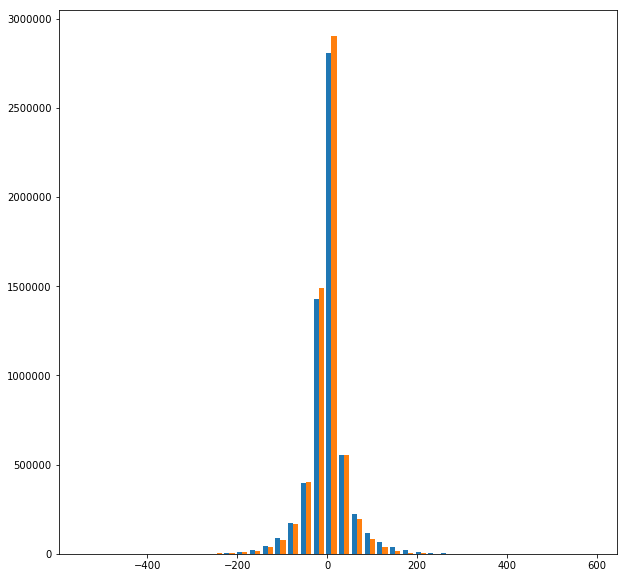

In [95]:
plt.figure(figsize=(10,10))
plt.hist([A11,A22], bins=40)
plt.show()

# Prueba con imágenes del dataset del Dr. Edgar

In [4]:
def imagen_verde(path):
    im=cv2.imread(path)
    B, G, R = cv2.split(im) #otra forma de separar los colores
    return G

In [5]:
def conversion_float(c2):
    return c2.astype(np.float64)
    

In [7]:
# FILTRO HP(Pasa-altas)
def filtro_hp():
    #h=np.array([[0,1,0],[1,-4,1],[0,1,0]]) # arreglo de un filtro HP
    return np.array([[0,1,0],[1,-4,1],[0,1,0]]) # arreglo de un filtro HP


In [8]:
# CONVOLUCION
def convolucion(imag_HP_float,h):
    A=imag_HP_float.copy()
    m,n=A.shape
    B=np.zeros((m,n));
    for i in range(m-1):
        for j in range(n-1):
            B[i,j]=(h[0,0]*A[i-1,j-1]+ h[0,1]*A[i-1,j]+h[0,2]*A[i-1,j+1])+h[1,0]*A[i,j-1]+h[1,1]*A[i,j]+h[1,2]*A[i,j+1]+h[2,0]*A[i+1,j-1]+h[2,1]*A[i+1,j]+h[2,2]*A[i+1,j+1]
            #B[i,j]=abs(B[i,j])
    return B

In [6]:
# Obtención de varianza y media
#m, n = img.shape
def val_estadisticos(A):
    m,n=A.shape
    A1=[]
    A2=[]
    for i in range(0,m,1):  # filas
      
        for j in range(0, n-1,2):  # Columnas
       
                if i%2==0:
                    A1.append(A[i,j])
                    A2.append(A[i,j+1])
                else:
                    A2.append(A[i,j])
                    A1.append(A[i,j+1])
                
    
    
    return A1,A2


In [7]:
# 
def estimacion_ruido(A):
    
    filtro_Gauss_float=cv2.GaussianBlur(A,(3,3),0) #el valor de (7,7), es el tamaño del kernel.
    
    return A-filtro_Gauss_float
    

In [22]:

imag_float=conversion_float(imagen_verde('foto.jpg')) #imagen de tipo flotante


In [23]:
E=estimacion_ruido(imag_float)

In [111]:
#imag_convolucionada1 = convolucion(E, matriz_filtro_HP)

In [27]:
A1,A2=val_estadisticos(E)

In [29]:
print("varianza v1",var(A1),"media A1",np.mean(A1))
print("varianza v2",var(A2),"media A2",np.mean(A2))

varianza v1 150.72324461885603
varianza v2 112.37280714757253
media A1 -0.17983493334252335
media A2 0.17951415734680667


# HACER UN CICLO PARA UN DATASET DE IMAGENES

In [8]:
def lectura_imagenes(camino):
    input_images_path =camino
    data_path = os.path.join(input_images_path,'*')
    files = glob.glob(data_path) 
    data = [] 
    for f1 in files: 
        #images = cv2.imread(f1,cv2.IMREAD_GRAYSCALE)
             
        images = cv2.imread(f1)
        B, G, R = cv2.split(images)
        data.append(G)
        #plt.imshow(images,cmap='gray')
        #plt.show()
    return data


In [13]:
def calculo_estadistico(data):
    N1=2
    SIZE=255
    cota=[]
    for c in range(0, 3):
        print('imagen ',c) 
        #plt.imshow(img_new,cmap='gray')
        #image = cv2.resize(data[c],(SIZE,SIZE),interpolation = cv2.INTER_NEAREST)
        
        #E=estimacion_ruido(image)
        data[c] = conversion_float(data[c])
        E = estimacion_ruido(data[c])
        A1,A2=val_estadisticos(E)
        print("varianza v1",var(A1),"media A1",np.mean(A1))
        print("varianza v2",var(A2),"media A2",np.mean(A2))
        #plt.imshow(image,cmap='gray')
        #plt.show()
    return A1,A2,E
    

In [54]:
data=lectura_imagenes("./fotografias/Canon_600D")

In [55]:
print("Canon_600D")
A1,A2,E=calculo_estadistico(data)

Canon_600D
imagen  0
varianza v1 4.676751194584483 media A1 0.00014437451774691358
varianza v2 4.675993313254304 media A2 2.290702160493827e-06
imagen  1
varianza v1 1.1716735537258192 media A1 -0.0003363715277777778
varianza v2 1.1703710512058891 media A2 0.0004352936921296296
imagen  2
varianza v1 2.8373997282836525 media A1 9.10252700617284e-05
varianza v2 2.8401097421595827 media A2 0.0002888695987654321


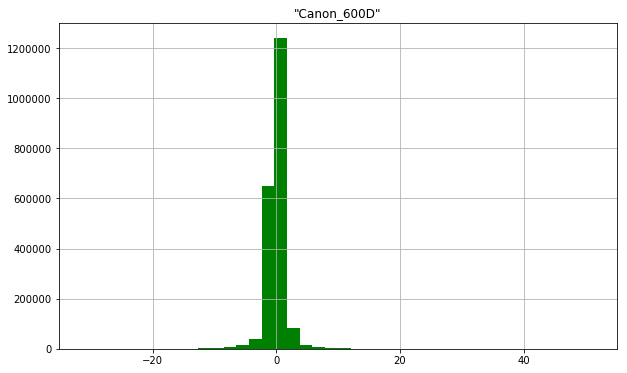

In [56]:
plt.hist(E.flatten(), facecolor='g',bins=40)

#plt.xlabel('')
#plt.ylabel('Probability')
plt.title('"Canon_600D"')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


In [58]:
data=lectura_imagenes("./fotografias/Niko_D7000")
print("Niko_D7000")
A1,A2,E=calculo_estadistico(data)

Niko_D7000
imagen  0
varianza v1 1.0689976194753534 media A1 0.001521749614197531
varianza v2 3.006055576843725 media A2 -0.0015899281442901235
imagen  1
varianza v1 4.792520304436511 media A1 0.004468496817129629
varianza v2 8.677736575744838 media A2 -0.004099151234567901
imagen  2
varianza v1 7.265559317726515 media A1 -0.01055079330632716
varianza v2 12.087223005433232 media A2 0.00986496913580247


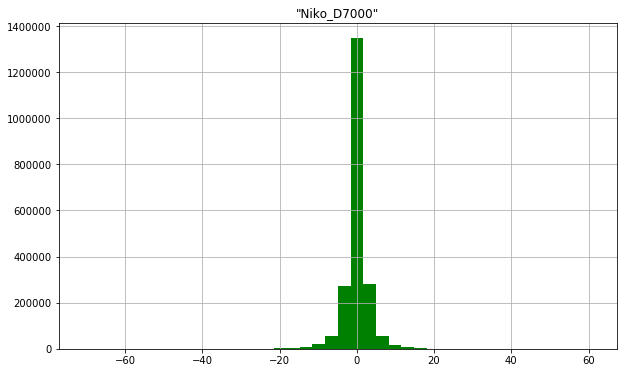

In [59]:
plt.hist(E.flatten(), facecolor='g',bins=40)
#plt.xlabel('')
#plt.ylabel('Probability')
plt.title('"Niko_D7000"')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()
plt.show()

In [60]:
data=lectura_imagenes("./fotografias/Nikon_D90")
print("Nikon_D90")
A1,A2,E=calculo_estadistico(data)

Nikon_D90
imagen  0
varianza v1 4.184269908665353 media A1 0.020544825424382716
varianza v2 10.373832966515382 media A2 -0.021247950424382715
imagen  1
varianza v1 19.213599985008273 media A1 0.0114135440779321
varianza v2 23.61477998448043 media A2 -0.010365487557870371
imagen  2
varianza v1 9.486964964141723 media A1 0.0795436077353395
varianza v2 29.868266114486882 media A2 -0.07993055555555556


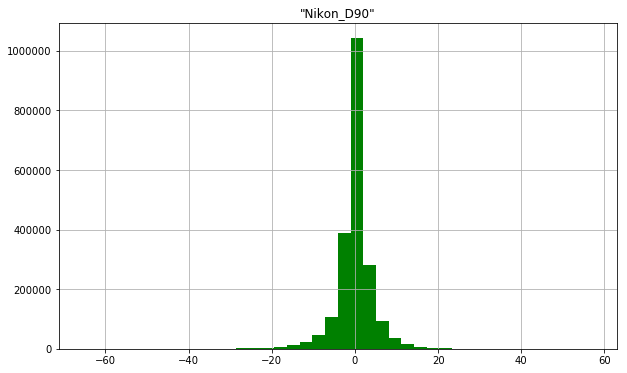

In [61]:
plt.hist(E.flatten(), facecolor='g',bins=40)
#plt.xlabel('')
#plt.ylabel('Probability')
plt.title('"Nikon_D90"')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()
plt.show()
plt.show()

In [62]:
data=lectura_imagenes("./fotografias/Sony_A57")
print("Sony_A57")
A1,A2,E=calculo_estadistico(data)

Sony_A57
imagen  0
varianza v1 4.684376801995876 media A1 -0.009701605902777778
varianza v2 5.604928177977279 media A2 0.009435100790895061
imagen  1
varianza v1 13.408864552451426 media A1 -0.001441333912037037
varianza v2 16.0697433475549 media A2 0.0009427445023148148
imagen  2
varianza v1 4.799444164670543 media A1 -0.004953342013888889
varianza v2 5.737192542470401 media A2 0.00931929976851852


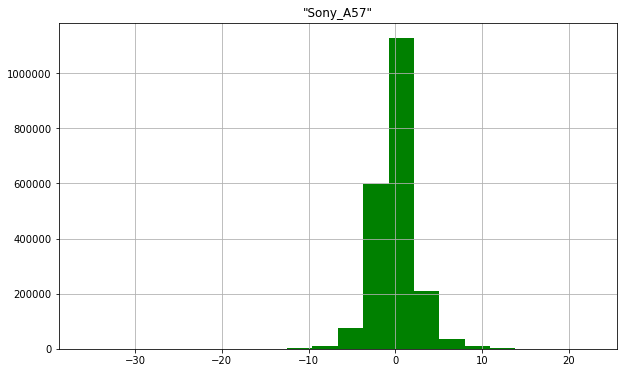

In [63]:
plt.hist(E.flatten(), facecolor='g', bins=20)
#plt.xlabel('')
#plt.ylabel('Probability')
plt.title('"Sony_A57"')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()
plt.show()
plt.show()
plt.show()

##### PRUEBA DE LA MATRIZ

In [18]:
matriz=np.array([[40,50,40,40,70,90,60],[80,99,100,109,59,68,29],[70,208,100,130,200,150,70],[80,89,120,180,230,200,90],[40,50,40,40,70,90,60],[80,99,100,109,59,68,29],[70,208,100,130,200,150,70]])

In [19]:
print(matriz)

[[ 40  50  40  40  70  90  60]
 [ 80  99 100 109  59  68  29]
 [ 70 208 100 130 200 150  70]
 [ 80  89 120 180 230 200  90]
 [ 40  50  40  40  70  90  60]
 [ 80  99 100 109  59  68  29]
 [ 70 208 100 130 200 150  70]]


In [20]:
A=matriz.copy()
m,n=A.shape
B=np.zeros((m,n));
i=2
j=2
#h=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
h=np.array([[0,1,0],[1,-4,1],[0,1,0]]) # arreglo de un filtro HP

In [ ]:
for i in range(m-1):
    for j in range(n-1):
        B[i,j]=(h[0,0]*A[i-1,j-1]+ h[0,1]*A[i-1,j]+h[0,2]*A[i-1,j+1])+h[1,0]*A[i,j-1]+h[1,1]*A[i,j]+h[1,2]*A[i,j+1]+h[2,0]*A[i+1,j-1]+h[2,1]*A[i+1,j]+h[2,2]*A[i+1,j+1]
        #B[i,j]=abs(B[i,j])

        

In [10]:

A=matriz.copy()
m,n=A.shape
B=np.zeros((m,n));


In [22]:
for i in range(m-1):
    print("valor de i",i)
    for j in range(n-1):
        
        B[i,j]=(h[0,0]*A[i-1,j-1]+ h[0,1]*A[i-1,j]+h[0,2]*A[i-1,j+1])+h[1,0]*A[i,j-1]+h[1,1]*A[i,j]+h[1,2]*A[i,j+1]+h[2,0]*A[i+1,j-1]+h[2,1]*A[i+1,j]+h[2,2]*A[i+1,j+1]
        #B[i,j]=abs(B[i,j])


valor de i 0
valor de j 0
valor de j 1
valor de j 2
valor de j 3
valor de j 4
valor de j 5
valor de i 1
valor de j 0
valor de j 1
valor de j 2
valor de j 3
valor de j 4
valor de j 5
valor de i 2
valor de j 0
valor de j 1
valor de j 2
valor de j 3
valor de j 4
valor de j 5
valor de i 3
valor de j 0
valor de j 1
valor de j 2
valor de j 3
valor de j 4
valor de j 5
valor de i 4
valor de j 0
valor de j 1
valor de j 2
valor de j 3
valor de j 4
valor de j 5
valor de i 5
valor de j 0
valor de j 1
valor de j 2
valor de j 3
valor de j 4
valor de j 5
[[ 100.  187.  130.  189.  109.  -12.    0.]
 [ -82.   42.  -52. -107.  211.   56.    0.]
 [ 158. -474.  158.   69. -231.  -62.    0.]
 [ -31.  102.  -71. -200. -270. -240.    0.]
 [ 110.   68.  150.  239.  139.   38.    0.]
 [ -82.   42.  -52. -107.  211.   56.    0.]
 [   0.    0.    0.    0.    0.    0.    0.]]


In [23]:
#m, n = img.shape
import statistics 
from numpy import var
temp=0  
temp1=0
img_new = np.zeros([m,n])
A1=[]
A2=[]
for i in range(0,m,1):  # filas
    #print("fila",i)
    
    for j in range(0, n-1,2):  # Columnas
       
            if i%2==0:
                #print(A[i,j])
                A1.append(B[i,j])
                A2.append(B[i,j+1])
                print(A1)
                print(A2)
                #temp1 = A[i-1,j+1]+A[i, j+2]+A[i+1, j+1]+A[i,j]
                #img_new[i,j+1]= temp1/3
            else:
                A2.append(B[i,j])
                A1.append(B[i,j+1])
                print(A2)
                #j=j-1
                #temp1 = A[i-1,j+1]+A[i, j+2]+A[i+1, j+1]+A[i,j]
                #img_new[i,j+1]= temp1/3

#print(A1)
#print(A2)

#print(np.mean(A1))
#print(np.mean(A2))
#print(img_new)
#plt.imshow(img_new,cmap='gray')

[40]
[50]
[40, 40]
[50, 40]
[40, 40, 70]
[50, 40, 90]
[50, 40, 90, 80]
[50, 40, 90, 80, 100]
[50, 40, 90, 80, 100, 59]
[40, 40, 70, 99, 109, 68, 70]
[50, 40, 90, 80, 100, 59, 208]
[40, 40, 70, 99, 109, 68, 70, 100]
[50, 40, 90, 80, 100, 59, 208, 130]
[40, 40, 70, 99, 109, 68, 70, 100, 200]
[50, 40, 90, 80, 100, 59, 208, 130, 150]
[50, 40, 90, 80, 100, 59, 208, 130, 150, 80]
[50, 40, 90, 80, 100, 59, 208, 130, 150, 80, 120]
[50, 40, 90, 80, 100, 59, 208, 130, 150, 80, 120, 230]
[40, 40, 70, 99, 109, 68, 70, 100, 200, 89, 180, 200, 40]
[50, 40, 90, 80, 100, 59, 208, 130, 150, 80, 120, 230, 50]
[40, 40, 70, 99, 109, 68, 70, 100, 200, 89, 180, 200, 40, 40]
[50, 40, 90, 80, 100, 59, 208, 130, 150, 80, 120, 230, 50, 40]
[40, 40, 70, 99, 109, 68, 70, 100, 200, 89, 180, 200, 40, 40, 70]
[50, 40, 90, 80, 100, 59, 208, 130, 150, 80, 120, 230, 50, 40, 90]
[50, 40, 90, 80, 100, 59, 208, 130, 150, 80, 120, 230, 50, 40, 90, 80]
[50, 40, 90, 80, 100, 59, 208, 130, 150, 80, 120, 230, 50, 40, 90, 80, 1

In [11]:
B=np.zeros((8,8))
for i in range(8):
    for j in range(0,7,2):
        B[i,(i%2)+j]=1
print(B)

[[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]


In [12]:
#m, n = img.shape
import statistics 
from numpy import var
m,n=B.shape
A1=[]
A2=[]
for i in range(0,m,1):  # filas
    for j in range(0, n-1,2):  # Columnas
            if i%2==0:
                
                A1.append(B[i,j])
                A2.append(B[i,j+1])
                
            else:
                A2.append(B[i,j])
                A1.append(B[i,j+1])
                

print("A1",A1)
print("A2",A2)



A1 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
A2 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
